# _Python for Scientific Data Analysis_

# NumPy/SciPy

## Section 4: More Array Operations: Concatenating, Stacking and Splitting, Repeating, and Meshgrid; Array Broadcasting

### Concatenation 

#### _concatenating vectors and matrices_ 

NumPy allows a fairly straightforward way to concatenate arrays with the ``np.concatenate`` function.   The function accepts a list of arrays (i.e. enclosed by [ ]). Here's an example:

In [1]:
import numpy as np

In [2]:
arr = np.random.randn(5, 4)
print(arr)
print('')
print(arr.shape)

[[ 0.91419532 -1.12991015  0.27137995 -0.03532943]
 [ 0.17294762 -0.10380143  1.20117938 -1.97013815]
 [ 0.14314371  0.84651585  0.64002546 -0.61801732]
 [-1.84278932 -0.92922423  0.52820531 -0.62295754]
 [-0.67360529  0.43831893  0.56053548 -0.29168368]]

(5, 4)


In [3]:
arr2=arr+np.random.randn(arr.shape[0],arr.shape[1])*0.1  #create another array that is just slightly different from the first one

print(arr2)
print(arr2.shape)

[[ 0.87014581 -1.15137073  0.24986993 -0.0107928 ]
 [ 0.12368277 -0.09244631  1.13469908 -1.82721004]
 [ 0.11803587  0.81064621  0.56151291 -0.76892583]
 [-1.83484653 -0.93498655  0.37631004 -0.64075553]
 [-0.82398499  0.40272898  0.59572897 -0.32350704]]
(5, 4)


In [4]:
print('')
arr3=np.concatenate([arr,arr2])

print(arr3)

print(arr2.shape, arr3.shape)


[[ 0.91419532 -1.12991015  0.27137995 -0.03532943]
 [ 0.17294762 -0.10380143  1.20117938 -1.97013815]
 [ 0.14314371  0.84651585  0.64002546 -0.61801732]
 [-1.84278932 -0.92922423  0.52820531 -0.62295754]
 [-0.67360529  0.43831893  0.56053548 -0.29168368]
 [ 0.87014581 -1.15137073  0.24986993 -0.0107928 ]
 [ 0.12368277 -0.09244631  1.13469908 -1.82721004]
 [ 0.11803587  0.81064621  0.56151291 -0.76892583]
 [-1.83484653 -0.93498655  0.37631004 -0.64075553]
 [-0.82398499  0.40272898  0.59572897 -0.32350704]]
(5, 4) (10, 4)


Note that the ``shape`` of the two input arrays  -- ``arr`` and ``arr2`` -- are each (5,4).   And the shape of the concatenated array is (10,4) (ten rows and four columns).  Now we can invoke the ``axis`` keyword to control _how_ these arrays are concatenated.  I.e. 

In [5]:

arr4=np.concatenate([arr,arr2],axis=1)

print(arr4)

print(arr4.shape)

print('')
arr4b=np.concatenate([arr,arr2],axis=0) #same as original example

print(arr4b)

print(arr4b.shape)

[[ 0.91419532 -1.12991015  0.27137995 -0.03532943  0.87014581 -1.15137073
   0.24986993 -0.0107928 ]
 [ 0.17294762 -0.10380143  1.20117938 -1.97013815  0.12368277 -0.09244631
   1.13469908 -1.82721004]
 [ 0.14314371  0.84651585  0.64002546 -0.61801732  0.11803587  0.81064621
   0.56151291 -0.76892583]
 [-1.84278932 -0.92922423  0.52820531 -0.62295754 -1.83484653 -0.93498655
   0.37631004 -0.64075553]
 [-0.67360529  0.43831893  0.56053548 -0.29168368 -0.82398499  0.40272898
   0.59572897 -0.32350704]]
(5, 8)

[[ 0.91419532 -1.12991015  0.27137995 -0.03532943]
 [ 0.17294762 -0.10380143  1.20117938 -1.97013815]
 [ 0.14314371  0.84651585  0.64002546 -0.61801732]
 [-1.84278932 -0.92922423  0.52820531 -0.62295754]
 [-0.67360529  0.43831893  0.56053548 -0.29168368]
 [ 0.87014581 -1.15137073  0.24986993 -0.0107928 ]
 [ 0.12368277 -0.09244631  1.13469908 -1.82721004]
 [ 0.11803587  0.81064621  0.56151291 -0.76892583]
 [-1.83484653 -0.93498655  0.37631004 -0.64075553]
 [-0.82398499  0.40272898  

This yields an array ``arr4`` with a shape of (5,8) (i.e now we have five rows and eight columns) and ``arr4b`` which was our original example.

### Stacking and Splitting

#### _array stacking_

In the previous sections you found how you can create NumPy arrays as 1-D vectors and then reshape these 1-D vectors into 2-D arrays (matrices).   And you also saw how to combine arrays together via concatenation.   Now if, for whatever reason, you just are philosophically opposed to concatenation never fear: there is another NumPy operation at your disposal: _stacking_.   There are a couple of ways to stack arrays.

* _hstack_ - stacks arrays horizontally
* _vstack_ - stacks arrays vertically
* _columnstack_ stacks vectors in columns

A simple example:

In [6]:
newarr=np.array([1,2,3,4,5])
newarr2=np.array([6,7,8,9,10])
print(newarr.shape,newarr2.shape)

(5,) (5,)


In [7]:
np.vstack([newarr,newarr2])
result=np.vstack([newarr,newarr2])
print(result)
print(result.shape)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
(2, 5)


In [8]:
np.hstack([newarr,newarr2])
result=np.hstack([newarr,newarr2])
print(result)
print(result.shape)

[ 1  2  3  4  5  6  7  8  9 10]
(10,)


In [9]:
np.column_stack([newarr,newarr2])
result_colstack=np.column_stack([newarr,newarr2])
print(result_colstack)
print(result_colstack.shape)

[[ 1  6]
 [ 2  7]
 [ 3  8]
 [ 4  9]
 [ 5 10]]
(5, 2)


A slightly more involved example with a matrix instead of a 1-D vector.

In [10]:
arr5=np.vstack([arr,arr2])
print(arr5)
print(arr5.shape)

[[ 0.91419532 -1.12991015  0.27137995 -0.03532943]
 [ 0.17294762 -0.10380143  1.20117938 -1.97013815]
 [ 0.14314371  0.84651585  0.64002546 -0.61801732]
 [-1.84278932 -0.92922423  0.52820531 -0.62295754]
 [-0.67360529  0.43831893  0.56053548 -0.29168368]
 [ 0.87014581 -1.15137073  0.24986993 -0.0107928 ]
 [ 0.12368277 -0.09244631  1.13469908 -1.82721004]
 [ 0.11803587  0.81064621  0.56151291 -0.76892583]
 [-1.83484653 -0.93498655  0.37631004 -0.64075553]
 [-0.82398499  0.40272898  0.59572897 -0.32350704]]
(10, 4)


In [11]:
      
arr6=np.hstack([arr,arr2])
print(arr6)
print(arr.shape,arr2.shape,arr6.shape)

[[ 0.91419532 -1.12991015  0.27137995 -0.03532943  0.87014581 -1.15137073
   0.24986993 -0.0107928 ]
 [ 0.17294762 -0.10380143  1.20117938 -1.97013815  0.12368277 -0.09244631
   1.13469908 -1.82721004]
 [ 0.14314371  0.84651585  0.64002546 -0.61801732  0.11803587  0.81064621
   0.56151291 -0.76892583]
 [-1.84278932 -0.92922423  0.52820531 -0.62295754 -1.83484653 -0.93498655
   0.37631004 -0.64075553]
 [-0.67360529  0.43831893  0.56053548 -0.29168368 -0.82398499  0.40272898
   0.59572897 -0.32350704]]
(5, 4) (5, 4) (5, 8)



You'll notice that in these cases the resulting arrays ``arr5`` and ``arr6`` are identical to ``arr3`` and ``arr4``, respectively.

In [12]:
print(arr5-arr3)
print(arr6-arr4)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


#### _array splitting_

``split``  slices apart an array into multiple arrays along an axis .  For example, starting with ``arr3`` from before

In [13]:
print(arr3)
       
print('')

[[ 0.91419532 -1.12991015  0.27137995 -0.03532943]
 [ 0.17294762 -0.10380143  1.20117938 -1.97013815]
 [ 0.14314371  0.84651585  0.64002546 -0.61801732]
 [-1.84278932 -0.92922423  0.52820531 -0.62295754]
 [-0.67360529  0.43831893  0.56053548 -0.29168368]
 [ 0.87014581 -1.15137073  0.24986993 -0.0107928 ]
 [ 0.12368277 -0.09244631  1.13469908 -1.82721004]
 [ 0.11803587  0.81064621  0.56151291 -0.76892583]
 [-1.83484653 -0.93498655  0.37631004 -0.64075553]
 [-0.82398499  0.40272898  0.59572897 -0.32350704]]



In [14]:
first,second=np.split(arr3,[1])

print(first)

print('')
print(second)

print(first.shape)
print(second.shape)
      

[[ 0.91419532 -1.12991015  0.27137995 -0.03532943]]

[[ 0.17294762 -0.10380143  1.20117938 -1.97013815]
 [ 0.14314371  0.84651585  0.64002546 -0.61801732]
 [-1.84278932 -0.92922423  0.52820531 -0.62295754]
 [-0.67360529  0.43831893  0.56053548 -0.29168368]
 [ 0.87014581 -1.15137073  0.24986993 -0.0107928 ]
 [ 0.12368277 -0.09244631  1.13469908 -1.82721004]
 [ 0.11803587  0.81064621  0.56151291 -0.76892583]
 [-1.83484653 -0.93498655  0.37631004 -0.64075553]
 [-0.82398499  0.40272898  0.59572897 -0.32350704]]
(1, 4)
(9, 4)


In [15]:
print(arr3)
#print('')

[[ 0.91419532 -1.12991015  0.27137995 -0.03532943]
 [ 0.17294762 -0.10380143  1.20117938 -1.97013815]
 [ 0.14314371  0.84651585  0.64002546 -0.61801732]
 [-1.84278932 -0.92922423  0.52820531 -0.62295754]
 [-0.67360529  0.43831893  0.56053548 -0.29168368]
 [ 0.87014581 -1.15137073  0.24986993 -0.0107928 ]
 [ 0.12368277 -0.09244631  1.13469908 -1.82721004]
 [ 0.11803587  0.81064621  0.56151291 -0.76892583]
 [-1.83484653 -0.93498655  0.37631004 -0.64075553]
 [-0.82398499  0.40272898  0.59572897 -0.32350704]]


In [16]:
first,second,third=np.split(arr3,[2,4])
#first,second=np.split(arr3,[2,4])

In [17]:
print(first)
print('')
print(second)
print('')
print(third)
print('')
       
print(first,second)
print(first.shape,second.shape)

[[ 0.91419532 -1.12991015  0.27137995 -0.03532943]
 [ 0.17294762 -0.10380143  1.20117938 -1.97013815]]

[[ 0.14314371  0.84651585  0.64002546 -0.61801732]
 [-1.84278932 -0.92922423  0.52820531 -0.62295754]]

[[-0.67360529  0.43831893  0.56053548 -0.29168368]
 [ 0.87014581 -1.15137073  0.24986993 -0.0107928 ]
 [ 0.12368277 -0.09244631  1.13469908 -1.82721004]
 [ 0.11803587  0.81064621  0.56151291 -0.76892583]
 [-1.83484653 -0.93498655  0.37631004 -0.64075553]
 [-0.82398499  0.40272898  0.59572897 -0.32350704]]

[[ 0.91419532 -1.12991015  0.27137995 -0.03532943]
 [ 0.17294762 -0.10380143  1.20117938 -1.97013815]] [[ 0.14314371  0.84651585  0.64002546 -0.61801732]
 [-1.84278932 -0.92922423  0.52820531 -0.62295754]]
(2, 4) (2, 4)


In [18]:
secondv2=np.split(arr3,[1],axis=1)

#print(first)
#print('')
print('the second is',secondv2)
#print(first.shape,second.shape)
print(type(first),type(second),type(secondv2)) #note this is tricky!)
#print(arr3.shape)

the second is [array([[ 0.91419532],
       [ 0.17294762],
       [ 0.14314371],
       [-1.84278932],
       [-0.67360529],
       [ 0.87014581],
       [ 0.12368277],
       [ 0.11803587],
       [-1.83484653],
       [-0.82398499]]), array([[-1.12991015,  0.27137995, -0.03532943],
       [-0.10380143,  1.20117938, -1.97013815],
       [ 0.84651585,  0.64002546, -0.61801732],
       [-0.92922423,  0.52820531, -0.62295754],
       [ 0.43831893,  0.56053548, -0.29168368],
       [-1.15137073,  0.24986993, -0.0107928 ],
       [-0.09244631,  1.13469908, -1.82721004],
       [ 0.81064621,  0.56151291, -0.76892583],
       [-0.93498655,  0.37631004, -0.64075553],
       [ 0.40272898,  0.59572897, -0.32350704]])]
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'list'>


### Repeating Array Elements

It's often useful to create an array that is a repeat or replication of another array some number of times.   E.g. IDL's replicate function does this for scalars: with some trickery you can make it work for vectors and arrays.   Python has stand-alone functions for exactly this purpose.

Two useful tools for repeating or replicating arrays to produce larger arrays are the
``repeat`` and ``tile`` functions. 

``repeat`` replicates each element in an array some number
of times, producing a larger array.  E.g.

In [19]:
a=np.arange(3)
#array([0,1,2])
print(a)
print(len(a))

[0 1 2]
3


In [20]:
print(a.repeat(3))
#array([0, 0, 0, 1, 1, 1, 2, 2, 2])
resultr=a.repeat(3)
len(resultr)

[0 0 0 1 1 1 2 2 2]


9

By default, if you pass an integer, each element will be repeated that number of times.
If you pass an array of integers, each element can be repeated a different number of
times:

In [21]:

a.repeat([2,3,4])
#array([0, 0, 1, 1, 1, 2, 2, 2, 2])


array([0, 0, 1, 1, 1, 2, 2, 2, 2])

Multidimensional arrays can have their elements repeated along a particular axis.

In [28]:
arr = np.random.randn(2, 2)
print(arr)
arr.shape


[[-0.27941683  1.75847934]
 [-1.17544882 -0.26526276]]


(2, 2)

In [29]:
print(arr.repeat(2,axis=0))


[[-0.27941683  1.75847934]
 [-0.27941683  1.75847934]
 [-1.17544882 -0.26526276]
 [-1.17544882 -0.26526276]]


In [30]:
     
arr.repeat(2,axis=1)

array([[-0.27941683, -0.27941683,  1.75847934,  1.75847934],
       [-1.17544882, -1.17544882, -0.26526276, -0.26526276]])

Note that if no axis is passed, the array will be flattened first, which is likely not what
you want. Similarly, you can pass an array of integers when repeating a multidimensional
array to repeat a given slice a different number of times:

In [31]:
arr.repeat([3,2], axis=0)

array([[-0.27941683,  1.75847934],
       [-0.27941683,  1.75847934],
       [-0.27941683,  1.75847934],
       [-1.17544882, -0.26526276],
       [-1.17544882, -0.26526276]])

``tile`` is different. tile, on the other hand, is a shortcut for stacking copies of an array along an axis.
Visually you can think of it as being akin to “laying down tiles”:

In [32]:
print(arr)
       

[[-0.27941683  1.75847934]
 [-1.17544882 -0.26526276]]


In [33]:
np.tile(arr,2)
result=np.tile(arr,2)
print(result)
result.shape

[[-0.27941683  1.75847934 -0.27941683  1.75847934]
 [-1.17544882 -0.26526276 -1.17544882 -0.26526276]]


(2, 4)

The second argument is the number of tiles; with a scalar, the tiling is made row by
row, rather than column by column. The second argument to tile can be a tuple
indicating the layout of the “tiling”:

In [38]:
print(arr)
print('')

print(np.tile(arr,(2,1)))

print('')

       
print(np.tile(arr,(1,2)))

print('')
print(np.tile(arr,(3,2)))

#some additional tests
print('difference ',np.tile(arr,2)-np.tile(arr,(1,2))) #i.e. these two things are the same

[[-0.27941683  1.75847934]
 [-1.17544882 -0.26526276]]

[[-0.27941683  1.75847934]
 [-1.17544882 -0.26526276]
 [-0.27941683  1.75847934]
 [-1.17544882 -0.26526276]]

[[-0.27941683  1.75847934 -0.27941683  1.75847934]
 [-1.17544882 -0.26526276 -1.17544882 -0.26526276]]

[[-0.27941683  1.75847934 -0.27941683  1.75847934]
 [-1.17544882 -0.26526276 -1.17544882 -0.26526276]
 [-0.27941683  1.75847934 -0.27941683  1.75847934]
 [-1.17544882 -0.26526276 -1.17544882 -0.26526276]
 [-0.27941683  1.75847934 -0.27941683  1.75847934]
 [-1.17544882 -0.26526276 -1.17544882 -0.26526276]]
difference  [[0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Meshgrid

NumPy arrays allow you to vectorize array expressions that might otherwise require writing loops (which Python is a lot slower at than C, Fortran, and Julia).   

One example of this is the ``np.meshgrid`` function, which takes two one-dimensional arrays and produces two two-dimensional matrices corresponding to all pairs of (x,y) in the two arrays.  

E.g.

In [49]:
points=np.arange(-5,5,0.25)
print(points)
print(len(points))



[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]
40


In [51]:
xs,ys= np.meshgrid(points,points) #returns a two-element list of NumPy arrays

print(len(points),xs.shape,ys.shape)


40 (40, 40) (40, 40)


Here, both xs and ys are arrays of dimension(1000,1000).

The use of ``meshgrid`` is that it allows an easy evaluation of functions of x and y (i.e. f(x,y)).

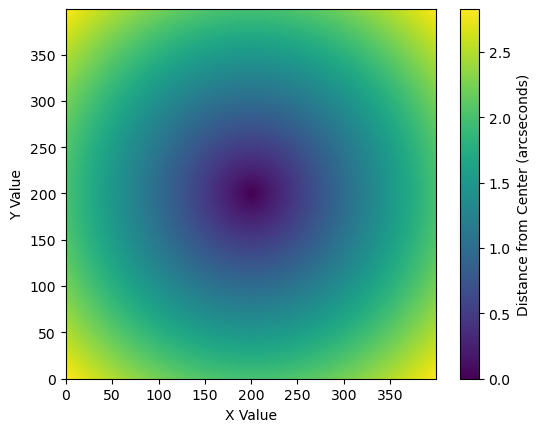

In [121]:
#e.g. create a grid of distances from some center point

#let's have a detector with a square array with dimensions of 400 by 400 pixels
#set the pixel scale to be 0.01 milli-arcseconds per pixel

points=np.arange(400)
#set the pixel scale to some value
pixscale=0.01

xarr,yarr=np.meshgrid(points,points)

#Ex. 1
center=np.array( (len(points)//2,len(points)//2) ) #set the center to be at pixel 200,200 [indexed from 0]
#OR
#Ex. 2
#offset=150
#center=np.array( (len(points)//2-offset,len(points)//2) ) #set the center to be at pixel 100,200 [indexed from 0]

#print(center) a diagnostic
distance_from_center=np.sqrt( (xarr-center[0])**2 + (yarr-center[1])**2 )*pixscale 

##NOTE: in real images that you will read in for astronomy/planetary science -- i.e. from a fits file -- the dimensions are SWITCHED
#i.e. image = f(y,x), not f(x,y)

#now do a simple image display setup (we will discuss this later in the course)

import matplotlib.pyplot as plt #importing the plotting library Matplotlib


fig, ax = plt.subplots() #will explain later


 #define the extent manually: note, this is technically not needed 
extrange=list(np.array([np.min(xarr),np.max(xarr),np.min(yarr),np.max(yarr)]))

darr=ax.imshow(distance_from_center,origin='lower',cmap='viridis',extent=extrange) #plotting an image, returning the result as an object
#darr=ax.imshow(distance_from_center,origin='lower',cmap='viridis')

#plot the image object intensity scale
ax.set_xlabel('X Value')
ax.set_ylabel('Y Value')
fig.colorbar(darr,ax=ax,orientation='vertical',label='Distance from Center (arcseconds)')
plt.show()


### Array Broadcasting

Broadcasting refers to how arithmetic works between NumPy arrays of different shapes.  E.g. a vector array and a scalar.  

In [135]:
arr=np.arange(5)

arr*4


array([ 0,  4,  8, 12, 16])

Here, the array ``arr`` is not repeated four times but instead each element of the array is multiplied by a scalar value of 4.   We say that four is _broadcast_ to all of the array elements.   

For example, we can demean each column of an array by subtracting the column
means. In this case, it is very simple:

In [136]:
arr = np.random.randn(4, 3)
print(arr)
print('')

[[-0.55075259  0.2942546   1.21468386]
 [ 0.75565717  1.34832144 -0.44158696]
 [-0.50261635 -0.77157997 -0.20184986]
 [ 0.43467822 -0.8845213   0.76781266]]



In [138]:

print(np.mean(arr,axis=0))
print('')

print(np.mean(arr,axis=0).shape)

[ 0.03424162 -0.00338131  0.33476492]

(3,)


In [139]:

demeaned=arr-np.mean(arr,axis=0)
print(demeaned)
print('')

[[-0.5849942   0.29763591  0.87991894]
 [ 0.72141555  1.35170275 -0.77635188]
 [-0.53685796 -0.76819866 -0.53661479]
 [ 0.40043661 -0.88113999  0.43304773]]



In [144]:
#or
#print(demeaned.mean(0))
print(np.mean(demeaned,axis=0))
#array([-0., 0., -0.])

[2.77555756e-17 2.77555756e-17 1.38777878e-17]


Improper array broadcasting (or miscasting) is the source of many Python coding errors.   Which brings us to the broadcasting "rule":

_**Two arrays are compatible for broadcasting if for each trailing dimension (i.e., starting
from the end) the axis lengths match or if either of the lengths is 1. Broadcasting is
then performed over the missing or length 1 dimensions.**_

For example, for a (4,3) NumPy array and a (3,) array, the result is a (4,3) array where the (3,) array operates on each row of the first array.   For a (4,3) array and a (4,1) array, the result is a (4,3) array where the (4,1) array operates on every column.

Note that if you ask Python to do an impossible broadcast, you will get an error that looks something like this:

```
row_means=arr.mean(1)
arr-row_means
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ValueError: operands could not be broadcast together with shapes (4,3) (4,) 
```

In [148]:
#row_means=arr.mean(1)
row_means=np.mean(arr,axis=1)
print(row_means)
print(row_means.shape)
#arr-row_means

[ 0.31939529  0.55413055 -0.49201539  0.10598986]
(4,)


However, reshaping the array can avoid a broadcasting error:

In [151]:
#ow_means=arr.mean(1)
#arr-row_means
row_means=np.mean(arr,axis=1)
print(row_means)
print(row_means.shape)

[ 0.31939529  0.55413055 -0.49201539  0.10598986]
(4,)


In [152]:
print(arr)
arr-row_means.reshape(4,1)
#arr-row_means

[[-0.55075259  0.2942546   1.21468386]
 [ 0.75565717  1.34832144 -0.44158696]
 [-0.50261635 -0.77157997 -0.20184986]
 [ 0.43467822 -0.8845213   0.76781266]]


array([[-0.87014788, -0.02514069,  0.89528857],
       [ 0.20152662,  0.79419089, -0.99571751],
       [-0.01060096, -0.27956457,  0.29016553],
       [ 0.32868836, -0.99051116,  0.6618228 ]])

A common problem, therefore, is needing to add a new axis with length 1 specifically
for broadcasting purposes. Using reshape is one option, but inserting an axis
requires constructing a tuple indicating the new shape. This can often be a tedious
exercise. Thus, NumPy arrays offer a special syntax for inserting new axes by indexing.
We use the special np.newaxis attribute along with “full” slices to insert the new
axis:

In [153]:

arr=np.zeros((4,4))

arr_3d=arr[:,np.newaxis,:]
arr_3d.shape
#(4,1,4)


(4, 1, 4)

Another example:

In [157]:
arr_1d=np.random.normal(size=3)
print(arr_1d)

[ 2.85197054 -0.55659879 -0.28577167]


In [158]:
arr_1d[:,np.newaxis] #a column vector

array([[ 2.85197054],
       [-0.55659879],
       [-0.28577167]])

In [159]:
        
arr_1d[np.newaxis,:] #a row vector

print(arr_1d.shape,arr_1d[np.newaxis,:].shape)


(3,) (1, 3)


The same broadcasting rule governing arithmetic operations also applies to setting
values via array indexing. In a simple case, we can do things like:

In [162]:

arr = np.zeros((4, 3)) #4x3 matrix
arr[:] = 5
print(arr)



[[5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]]


However, if we had a one-dimensional array of values we wanted to set into the columns
of the array, we can do that as long as the shape is compatible:

In [163]:
 col = np.array([1.28, -0.42, 0.44, 1.6])
 print(col)

[ 1.28 -0.42  0.44  1.6 ]


In [164]:
 arr[:] = col[:, np.newaxis]
 print(arr)
 print(col.shape,arr.shape)

[[ 1.28  1.28  1.28]
 [-0.42 -0.42 -0.42]
 [ 0.44  0.44  0.44]
 [ 1.6   1.6   1.6 ]]
(4,) (4, 3)


In [165]:
 arr[:2] = [[-1.37], [0.509]]
 arr
 #arr[:2] = [[-1.37, 0.509]]

array([[-1.37 , -1.37 , -1.37 ],
       [ 0.509,  0.509,  0.509],
       [ 0.44 ,  0.44 ,  0.44 ],
       [ 1.6  ,  1.6  ,  1.6  ]])

 Note, though that ``arr[:2] = [[-1.37, 0.509]]`` triggers a broadcasting error.
 

```
 Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ValueError: could not broadcast input array from shape (1,2) into shape (2,3)
```